In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import allplayers_wrangle as wr

# plotting defaults
plt.rc('figure', figsize=(16, 8))
plt.style.use('dark_background')
plt.rc('font', size=16)

In [2]:
def get_players_stats():
    stats = pd.read_csv('stats.csv')
    return stats.set_index('Player').sort_index(ascending=True)

In [3]:
stats = wr.get_players_stats()
stats

,Rk,Age,Team,GP,GS,MP,FG,FGA,2P,2PA,...,TOV,PF,PPG,FG_PCT,2P_PCT,3P_PCT,FT_PCT,TS_PCT,eFG_PCT,Pos
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Brooks,65,33,MIN,32,1,5.9,0.9,2.2,0.5,1.2,...,0.3,0.9,2.3,0.406,0.447,0.355,0.727,0.508,0.486,G
Aaron Gordon,180,22,ORL,58,57,32.9,6.5,14.9,4.5,9.0,...,1.8,1.9,17.6,0.434,0.497,0.336,0.698,0.530,0.500,F
Aaron Harrison,202,23,DAL,9,3,25.9,2.1,7.7,1.1,2.9,...,0.3,3.0,6.7,0.275,0.385,0.209,0.765,0.392,0.341,G
Aaron Jackson,244,31,HOU,1,0,35.0,3.0,9.0,2.0,5.0,...,1.0,4.0,8.0,0.333,0.400,0.250,0.500,0.405,0.389,G
Abdel Nader,363,24,BOS,48,1,10.9,1.0,3.1,0.6,1.8,...,0.7,0.9,3.0,0.336,0.321,0.354,0.590,0.439,0.413,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Randolph,422,36,SAC,59,57,25.6,6.1,12.9,5.3,10.4,...,2.0,2.0,14.5,0.473,0.503,0.347,0.785,0.529,0.507,F-C
Zaza Pachulia,387,33,GSW,69,57,14.1,2.2,3.8,2.2,3.8,...,1.0,1.8,5.4,0.564,0.567,0.000,0.806,0.612,0.564,C
Zhou Qi,418,22,HOU,18,0,6.9,0.3,1.8,0.2,0.7,...,0.6,0.8,1.2,0.188,0.308,0.105,0.667,0.295,0.219,F-C


In [4]:
advstats = wr.get_advstats()
advstats

,WS,ORtg,DRtg,OWS,DWS,OBPM,DBPM,BPM,VORP,PER,ORB_PCT,DRB_PCT,TRB_PCT,AST_PCT,STL_PCT,BLK_PCT,TOV_PCT,USG_PCT
Player,,,,,,,,,,,,,,,,,,
Aaron Brooks,0.1,103.0,115,0.1,0.1,-2.6,-1.3,-3.8,-0.1,9.8,4.2,6.2,5.2,15.1,1.6,0.0,13.0,19.9
Aaron Gordon,2.9,103.0,109,0.9,2.0,0.9,-0.6,0.3,1.1,16.5,5.0,21.5,13.2,11.7,1.5,1.9,10.0,24.7
Aaron Harrison,-0.1,87.0,110,-0.3,0.2,-6.8,-0.6,-7.5,-0.3,5.1,1.8,9.9,5.7,6.7,1.9,0.8,3.8,15.5
Aaron Jackson,0.0,91.0,114,0.0,0.0,-6.6,-2.3,-8.9,-0.1,2.4,6.5,3.2,4.8,4.0,0.0,0.0,9.2,13.7
Abdel Nader,-0.1,83.0,105,-0.9,0.8,-5.5,0.2,-5.3,-0.4,5.1,2.8,12.0,7.4,7.1,1.4,1.6,17.0,17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Randolph,1.5,101.0,111,0.3,1.2,0.5,-1.5,-1.0,0.4,17.3,7.0,23.7,15.0,14.9,1.4,0.6,12.5,27.6
Zaza Pachulia,3.3,117.0,105,1.8,1.4,-0.7,0.7,0.0,0.5,17.0,11.0,25.0,18.5,15.2,1.9,1.4,19.1,17.0
Zhou Qi,-0.3,61.0,102,-0.5,0.2,-10.3,0.2,-10.1,-0.3,1.9,5.5,14.4,10.0,2.1,0.8,9.6,21.2,16.8


In [5]:
def get_salaries():
    salaries = pd.read_csv('NBA_season1718_salary.csv')
    salaries.drop(columns=['Unnamed: 0','Tm'],inplace=True)
    salaries.rename(columns = {'season17_18' : 'salary'},inplace=True)
    return salaries.set_index('Player').sort_index(ascending=True)

In [6]:
salaries = get_salaries()
salaries

,salary
Player,
A.J. Hammons,1312611.0
Aaron Brooks,2116955.0
Aaron Gordon,5504420.0
Aaron Gray,452059.0
Abdel Nader,1167333.0
...,...
Zach Collins,3057240.0
Zach LaVine,3202217.0
Zach Randolph,12307692.0


In [7]:
ss = wr.prepare_ss()
ss

,rk,age,team,gp,gs,mp,fg,fga,2p,2pa,...,stl_pct,blk_pct,tov_pct,usg_pct,above_avg_scorer,above_avg_3ball,above_avg_ft,above_avg_ts,above_avg_usg_pct,salary
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Brooks,65.0,33.0,MIN,32.0,1.0,5.9,0.9,2.2,0.5,1.2,...,1.6,0.0,13.0,19.9,0.0,0.0,0.0,0.0,1.0,2116955.0
Aaron Gordon,180.0,22.0,ORL,58.0,57.0,32.9,6.5,14.9,4.5,9.0,...,1.5,1.9,10.0,24.7,1.0,0.0,0.0,0.0,1.0,5504420.0
Abdel Nader,363.0,24.0,BOS,48.0,1.0,10.9,1.0,3.1,0.6,1.8,...,1.4,1.6,17.0,17.1,0.0,0.0,0.0,0.0,0.0,1167333.0
Al Horford,228.0,31.0,BOS,72.0,72.0,31.6,5.1,10.5,3.8,7.3,...,0.9,2.9,14.1,18.4,0.0,1.0,1.0,1.0,0.0,27734405.0
Al Jefferson,251.0,33.0,IND,36.0,1.0,13.4,3.1,5.8,3.1,5.7,...,1.7,4.2,8.6,22.5,0.0,0.0,1.0,1.0,1.0,9769821.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Collins,102.0,20.0,POR,66.0,1.0,15.8,1.7,4.4,1.2,2.7,...,0.8,2.4,15.9,15.4,0.0,0.0,0.0,0.0,0.0,3057240.0
Zach LaVine,286.0,22.0,CHI,24.0,24.0,27.3,5.7,14.8,3.9,9.7,...,1.8,0.5,9.7,29.5,1.0,0.0,1.0,0.0,1.0,3202217.0
Zach Randolph,422.0,36.0,SAC,59.0,57.0,25.6,6.1,12.9,5.3,10.4,...,1.4,0.6,12.5,27.6,0.0,0.0,1.0,0.0,1.0,12307692.0


In [8]:
train, val, test = wr.wrangle_ss()
train.shape, val.shape, test.shape

((232, 54), (100, 54), (83, 54))

In [9]:
train.head()

,rk,age,team,gp,gs,mp,fg,fga,2p,2pa,...,stl_pct,blk_pct,tov_pct,usg_pct,above_avg_scorer,above_avg_3ball,above_avg_ft,above_avg_ts,above_avg_usg_pct,salary
Player,,,,,,,,,,,,,,,,,,,,,
Paul Zipser,538.0,23.0,CHI,54.0,12.0,15.3,1.5,4.3,0.8,2.3,...,1.2,1.6,14.9,15.2,0.0,0.0,0.0,0.0,0.0,1312611.0
Joe Ingles,237.0,30.0,UTA,82.0,81.0,31.4,4.1,8.8,1.6,3.1,...,1.8,0.7,17.4,15.9,0.0,1.0,1.0,1.0,0.0,14136364.0
Bismack Biyombo,48.0,25.0,ORL,82.0,25.0,18.2,2.2,4.3,2.2,4.3,...,0.7,5.1,16.6,14.9,0.0,0.0,0.0,1.0,0.0,17000000.0
Gerald Green,189.0,32.0,HOU,41.0,2.0,22.7,4.1,10.1,1.4,2.8,...,1.3,1.4,6.6,22.4,0.0,1.0,1.0,1.0,1.0,947248.0
Rodney Purvis,417.0,23.0,ORL,16.0,2.0,18.1,2.2,6.7,1.4,3.4,...,0.5,0.8,8.1,18.7,0.0,0.0,1.0,0.0,1.0,46080.0


# Data Exploration

## Exploring Target variable (Salary)

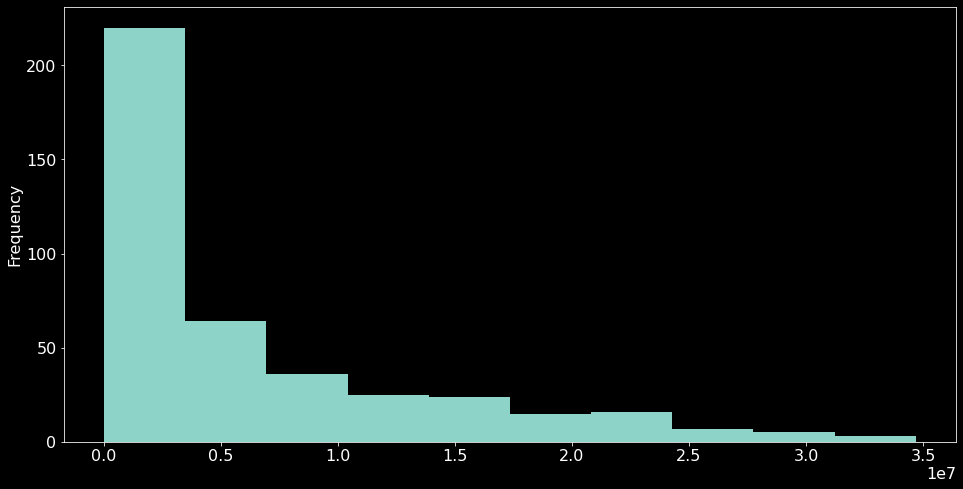

In [41]:
ss.salary.plot.hist()
plt.show()

## Which scoring aspect affects a players salary the most?

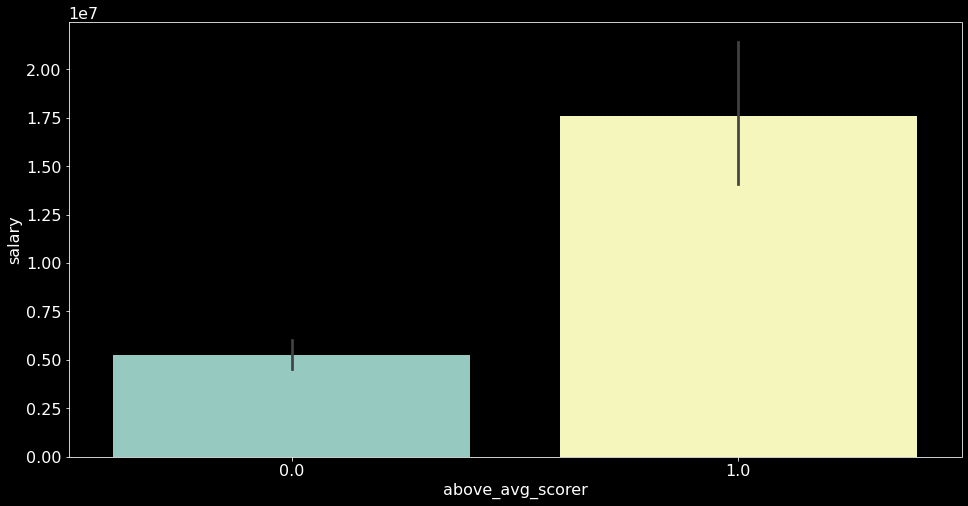

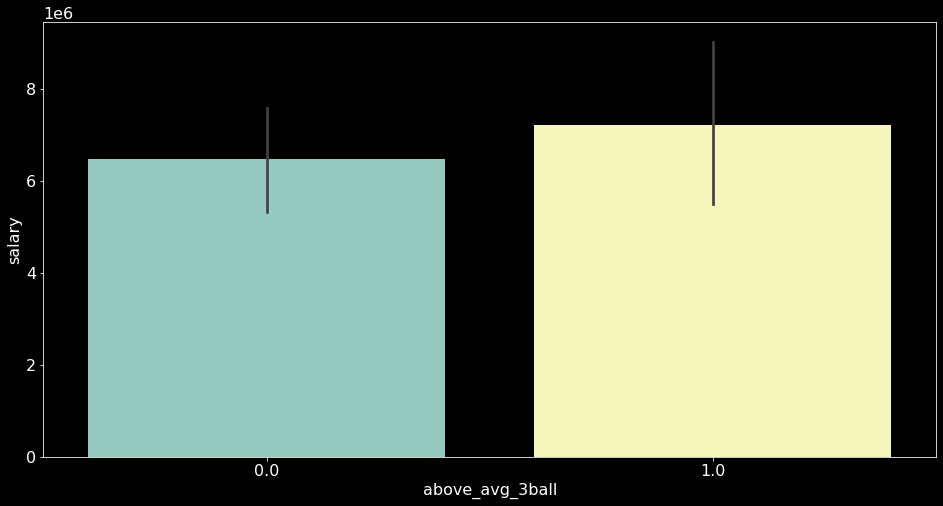

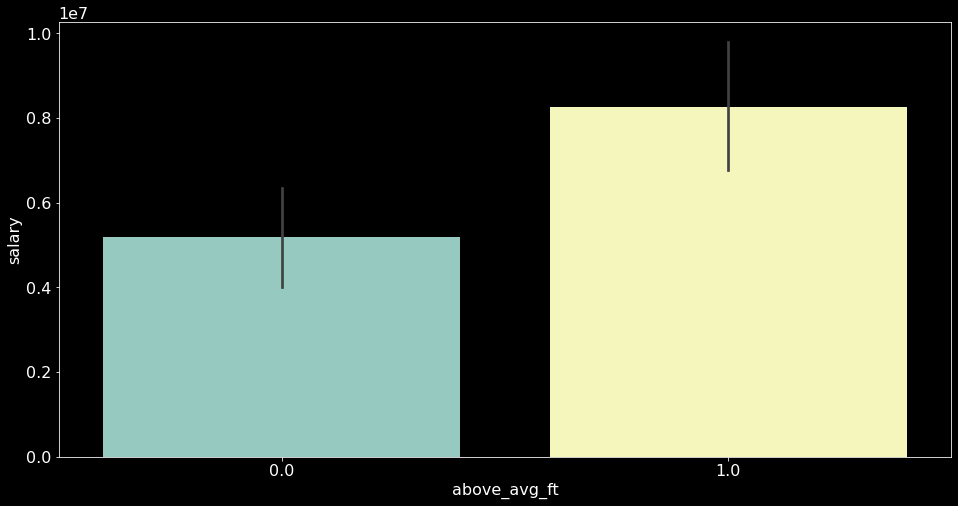

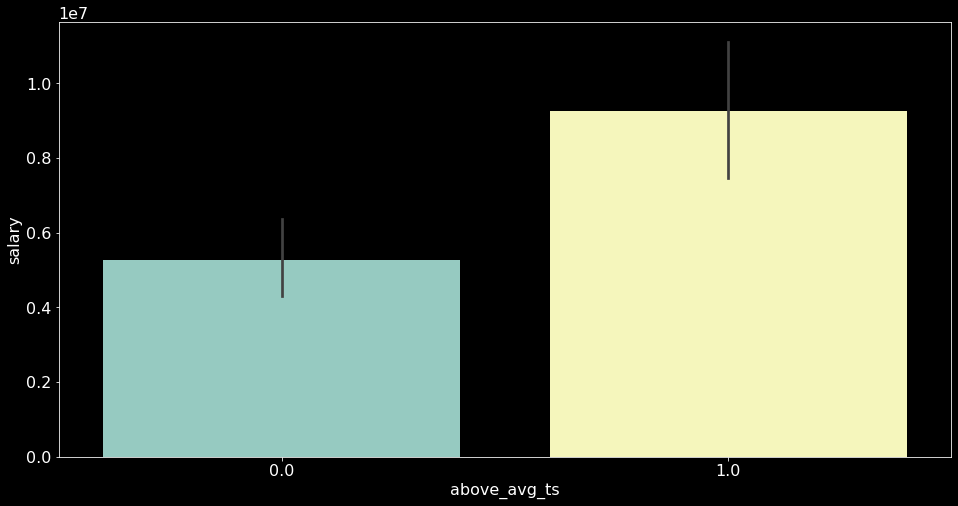

In [11]:
shooting_stats = ['above_avg_scorer','above_avg_3ball','above_avg_ft','above_avg_ts']

for i in shooting_stats:
    sns.barplot(x=i, y='salary', data=train)
    plt.show()

### Takeaways
- It seems that all of the feature engineered statistics, being above the league average in a scoring metric will land you a higher salary than those who do fall below league average.

- The biggest difference in salary is between a player who is above league average in scoring and players who are not above league average.

- This follows common logic as teams will see players are both more efficient and score at a higher rate as more valuable than those who need more shots to score or do not score as efficiently.


#### Scoring statistical testing
(H_0): Players with an above avg TS% and PPG DO NOT earn a significantly different salary than then the rest of the league.

(H_a): Players with an above avg TS% and PPG DO earn a significantly different salary than then the rest of the league.

In [12]:
not_a_baller = ss[(ss.above_avg_scorer == 0)&(ss.above_avg_ts == 0)].salary
baller = ss[(ss.above_avg_scorer == 1)&(ss.above_avg_ts == 1)].salary

# Set alpha
alpha = 0.05

# Check for equal variances
s, pval = st.levene(baller, not_a_baller)

# Use the results from checking for equal variances to set equal_var
t, p = st.ttest_ind(baller, not_a_baller, equal_var=(pval >= alpha))

# Evaluate results based on the t-statistic and the p-value
if p/2 < alpha and t > 0:
    print('''Reject the Null Hypothesis.
    
Players with an above avg TS% and PPG DO earn a significantly different salary than then the rest of the league.''')
else:
    print('''Fail to reject the Null Hypothesis.
    
Players with an above avg TS% and PPG DO NOT earn a significantly different salary than then the rest of the league.''')

Reject the Null Hypothesis.
    
Players with an above avg TS% and PPG DO earn a significantly different salary than then the rest of the league.


## Does a players usage percentage affect their salary?


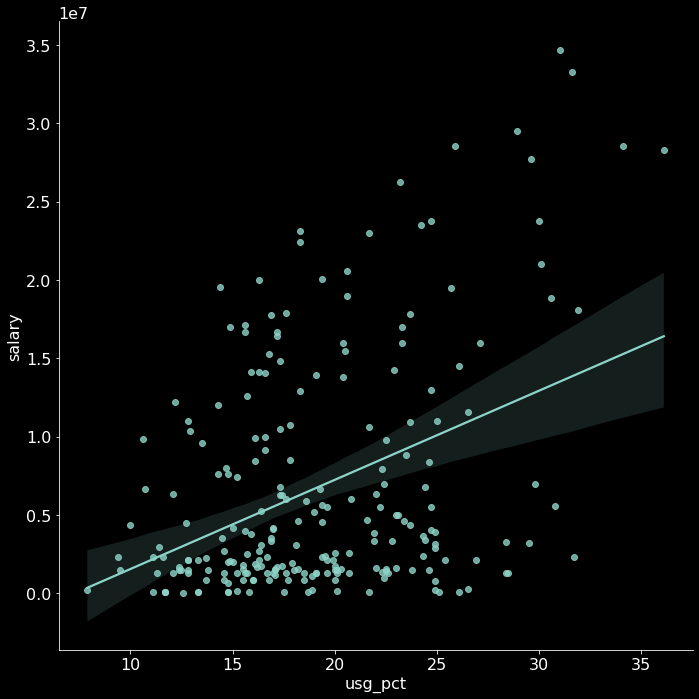

In [13]:
sns.lmplot(x='usg_pct', y='salary', data=train, height=10)
plt.show()

## Takeaways
- The reason for asking this question was to see if players who handled the ball more got paid more.

- It seems that be that there is some relationship between usgae percentage and salary.

- Perhaps teams see that if a player is to be running the offense more or handling the ball more they should be paid more to do so.

#### USG % statistical testing
(H_0): Players with an above avg USG % DO NOT earn a significantly different salary than then the rest of the league.

(H_a): Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.

In [18]:
notta_floor_general = ss[ss.above_avg_usg_pct == 0].salary
floor_general = ss[ss.above_avg_usg_pct == 1].salary

# Set alpha
alpha = 0.05

# Check for equal variances
s, pval = st.levene(floor_general, notta_floor_general)

# Use the results from checking for equal variances to set equal_var
t, p = st.ttest_ind(floor_general, notta_floor_general, equal_var=(pval >= alpha))

# Evaluate results based on the t-statistic and the p-value
if p/2 < alpha and t > 0:
    print('''Reject the Null Hypothesis.
    
Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.''')
else:
    print('''Fail to reject the Null Hypothesis.
    
Players with an above avg USG % DO NOT earn a significantly different salary than then the rest of the league.''')

Reject the Null Hypothesis.
    
Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.


## Does a players Box Plus Minus affect their salary?

To give a sense of the scale:

+10.0 is an all-time season (think peak Jordan or LeBron)
+8.0 is an MVP season (think peak Dirk or peak Shaq)
+6.0 is an all-NBA season
+4.0 is in all-star consideration
+2.0 is a good starter
+0.0 is a decent starter or solid 6th man
-2.0 is a bench player (this is also defined as "replacement level"


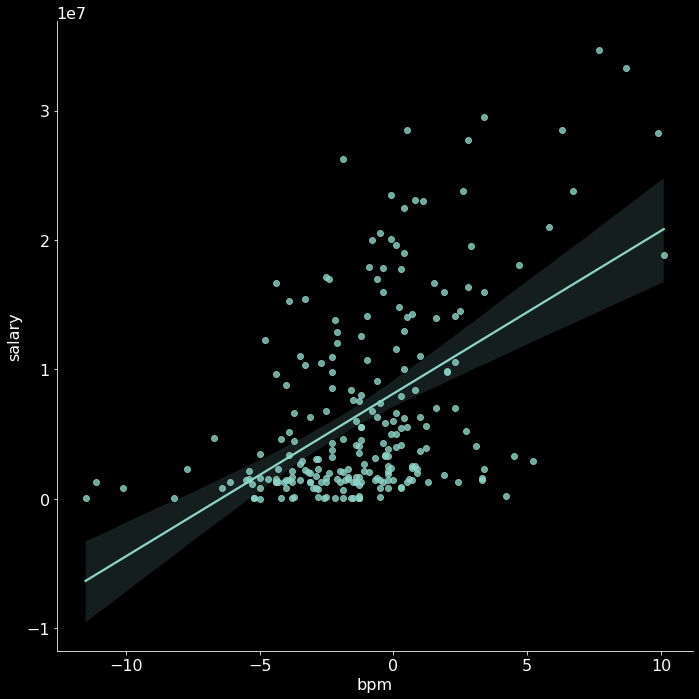

In [20]:
print(
    '''To give a sense of the scale:

+10.0 is an all-time season (think peak Jordan or LeBron)
+8.0 is an MVP season
+6.0 is an all-NBA season
+4.0 is in all-star consideration
+2.0 is a good starter
+0.0 is a decent starter or solid 6th man
-2.0 is a bench player (this is also defined as "replacement level"''')
sns.lmplot(x='bpm', y='salary', data=train, height=10)
plt.show()

### Takeaways
- With Box Plus minus being a stat the compares how a player affect's it's teams play it would make sense to think that players with higher BPM's also get paid more.
- Visually we can that that is the case, let's see if statistical testing can help prove that.

In [22]:
below_avg_bpm = ss[ss.bpm < ss.bpm.mean()].salary
above_avg_bpm = ss[ss.bpm >= ss.bpm.mean()].salary

# Set alpha
alpha = 0.05

# Check for equal variances
s, pval = st.levene(above_avg_bpm, below_avg_bpm)

# Use the results from checking for equal variances to set equal_var
t, p = st.ttest_ind(above_avg_bpm, below_avg_bpm, equal_var=(pval >= alpha))

# Evaluate results based on the t-statistic and the p-value
if p/2 < alpha and t > 0:
    print('''Reject the Null Hypothesis.
    
Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.''')
else:
    print('''Fail to reject the Null Hypothesis.
    
Players with an above avg USG % DO NOT earn a significantly different salary than then the rest of the league.''')

Reject the Null Hypothesis.
    
Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.


## Does position affect a players salary?

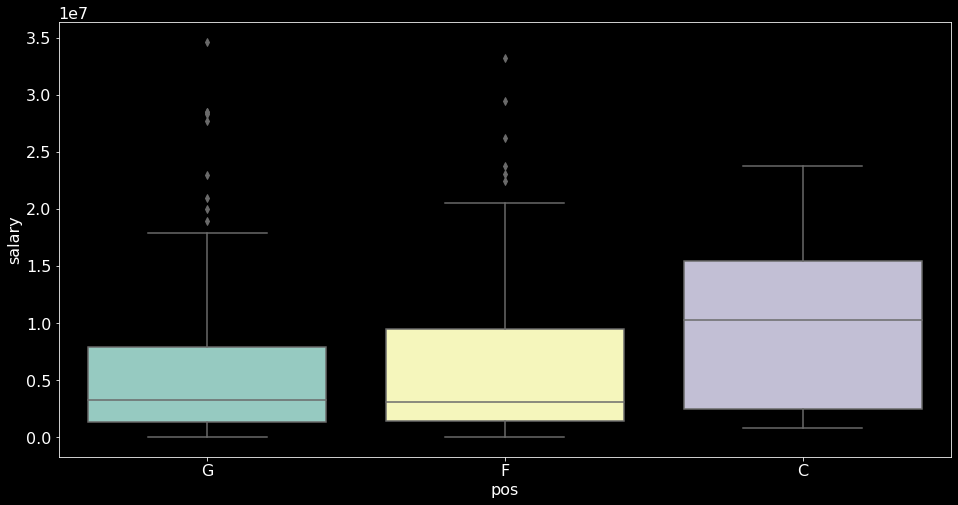

In [59]:
sns.boxplot(x='pos', y='salary', data=train)
plt.show()

### Takeaways
- Visually we see that players who are centers are paid more than those who are guards or wings.
- This goes against the common arguement that guards are more valuable in today's game.
- Let's see if statistical testing shows that or not.

#### USG % statistical testing
(H_0): Centers DO NOT make more than the league average.

(H_a): Centers DO make more than the league average.

In [66]:
centers_sal = train[train.pos == 'C'].salary
league_avg_sal = train.salary.mean()

# Set alpha
alpha = 0.05

t, p = st.ttest_1samp(centers_sal, league_avg_sal)

# Evaluate results based on the t-statistic and the p-value
if p/2 < alpha and t > 0:
    print('''Reject the Null Hypothesis.
    
Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.''')
else:
    print('''Fail to reject the Null Hypothesis.
    
Players with an above avg USG % DO NOT earn a significantly different salary than then the rest of the league.''')


Reject the Null Hypothesis.
    
Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.


## Exploration Summary

- Players with an above avg TS% and PPG DO earn a significantly different salary than then the rest of the league.

- Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.

- Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.

- We saw that a position that a player pays does have a impact on their salary.

# Modeling